Saving ISP_Mentor Check-in-January.csv to ISP_Mentor Check-in-January (1).csv
Saving ISP_Mentor Check-in-February.csv to ISP_Mentor Check-in-February (1).csv
Saving ISP_Mentor Check-in-December.csv to ISP_Mentor Check-in-December (1).csv
Saving ISP_Mentor Check-in-November.csv to ISP_Mentor Check-in-November (1).csv


<ipython-input-2-8af909f47c69>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = [pd.read_csv(fname, parse_dates=['Created']) for fname in files_list]
<ipython-input-2-8af909f47c69>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = [pd.read_csv(fname, parse_dates=['Created']) for fname in files_list]
<ipython-input-2-8af909f47c69>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs = [pd.read_csv(fname, parse_dates=['Created']) for fname in files_list]
<ipython-input-2-8af909f47c69>:65: UserWarning: Glyph 129310 (\N{HAND WITH INDEX AND MIDDLE FINGERS CROSSED})

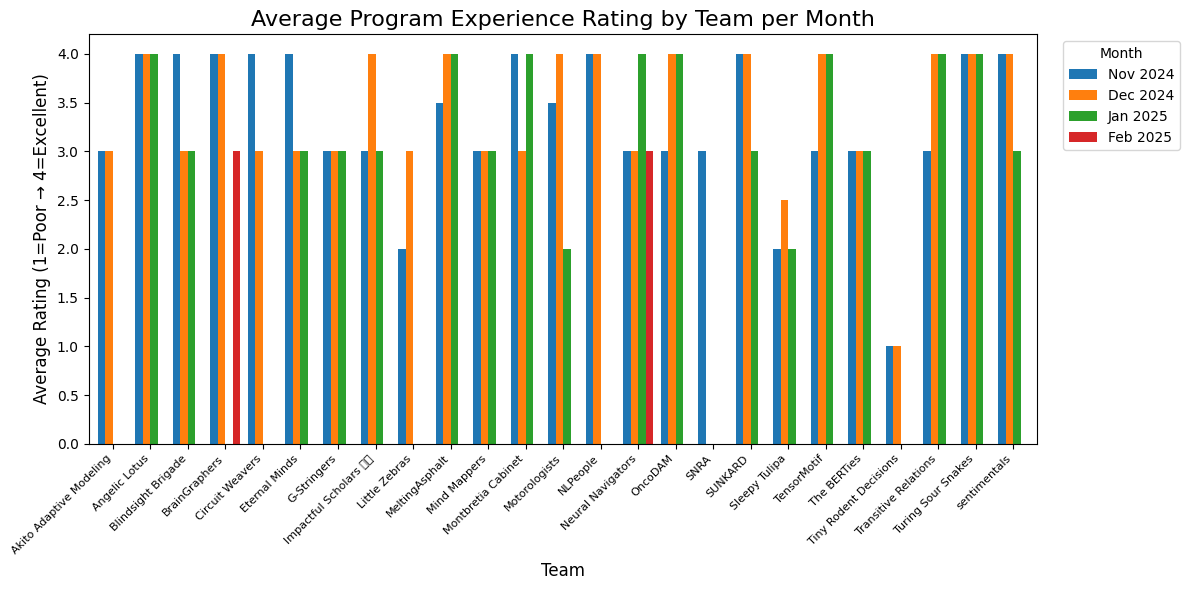

In [2]:
# 1) Upload your four CSVs into Colab
from google.colab import files
uploaded = files.upload()  # select your ISP_Mentor Check-in-*.csv files

# 2) Imports
import pandas as pd
import matplotlib.pyplot as plt

# 3) List of filenames (must exactly match your uploaded names)
files_list = [
    'ISP_Mentor Check-in-November.csv',
    'ISP_Mentor Check-in-December.csv',
    'ISP_Mentor Check-in-January.csv',
    'ISP_Mentor Check-in-February.csv'
]

# 4) Read & concatenate
dfs = [pd.read_csv(fname, parse_dates=['Created']) for fname in files_list]
df = pd.concat(dfs, ignore_index=True)

# 5) Dynamically detect the “team” & “rating” columns
team_col   = next(c for c in df.columns if 'select' in c.lower() and 'team' in c.lower())
rating_col = next(c for c in df.columns if 'program experience rating' in c.lower())

# 6) Extract month, map text→numeric rating
df['Created'] = pd.to_datetime(df['Created'])
df['Month']   = df['Created'].dt.to_period('M').dt.to_timestamp()
rating_map    = {'Excellent': 4, 'Good': 3, 'Average': 2, 'Poor': 1}
df['RatingNum'] = df[rating_col].map(rating_map)

# 7) Compute each team’s average rating per month
monthly_avg = (
    df
    .groupby(['Month', team_col])['RatingNum']
    .mean()
    .unstack(fill_value=0)
    .sort_index()
)

# 8) Plot: grouped bars with a high-contrast palette
plt.figure(figsize=(12, 6))
colors = plt.get_cmap('tab10')(range(len(monthly_avg.index)))
monthly_avg.T.plot(
    kind='bar',
    color=colors,
    width=0.8,
    legend=True,
    ax=plt.gca()
)

plt.title('Average Program Experience Rating by Team per Month', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Average Rating (1=Poor → 4=Excellent)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Clean month labels in legend
month_labels = [d.strftime('%b %Y') for d in monthly_avg.index]
plt.legend(
    month_labels,
    title='Month',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()
